# DACON Basic 여행 상품 분석 시각화 경진대회

### 라이브러리

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

### Data Load

In [2]:
df = pd.read_csv("./train.csv")

df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급)
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

`id`는 버림

In [3]:
df.drop(columns=["id"], inplace=True)

### 결측치 확인

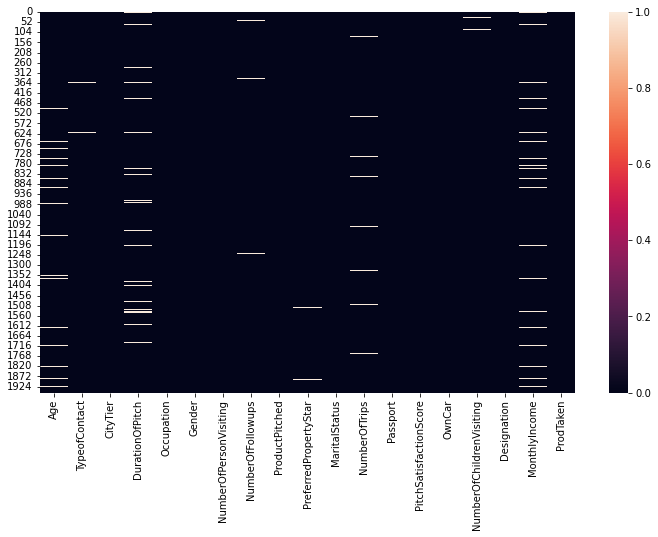

In [18]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isna())
plt.show()

시각화가 목적이므로 결측치는 모두 버림

In [19]:
df.dropna(inplace=True)

### Age: 나이

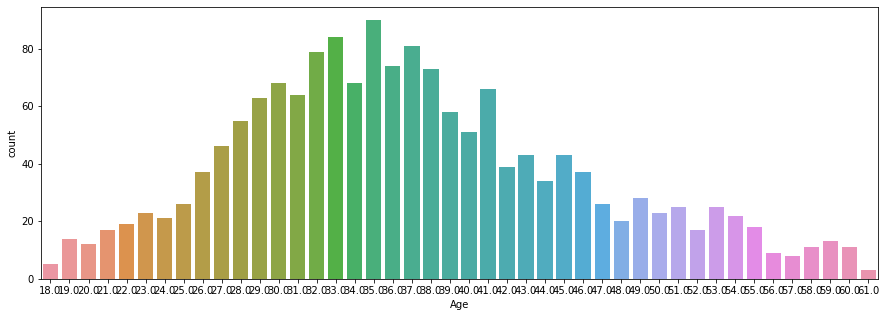

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Age")
plt.show()

#### Band Age
예측이나 분류에서는 주어진 데이터의 분포에 맞춰 정제하는 것이 좋은 성능의 모델을 만드는데 도움이 된다고 하지만, 시각화가 목표이므로 분포는 무시하고 일반적인 분포로 나눔

In [33]:
df["Band Age"] = df["Age"].map(lambda x: str(x)[0]+"0대")

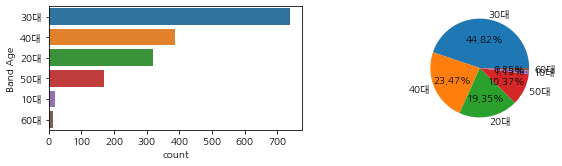

In [107]:
plt.figure(figsize=(10, 5))
plt.subplot(221)
sns.countplot(data=df, y="Band Age", order=df["Band Age"].value_counts().index)
plt.subplot(222)
plt.pie(df["Band Age"].value_counts().values, labels=df["Band Age"].value_counts().index, autopct="%.2f%%")
plt.show()

### TypeofContact: 인지 방법

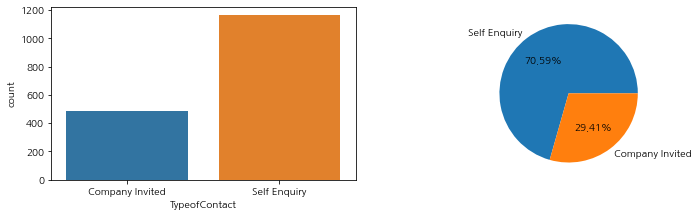

In [100]:
plt.figure(figsize=(12, 7))
plt.subplot(221)
sns.countplot(data=df, x="TypeofContact")
plt.subplot(222)
plt.pie(df["TypeofContact"].value_counts().values, labels=df["TypeofContact"].value_counts().index, autopct="%.2f%%")
plt.show()

### CityTier: 주거 중인 도시 등급

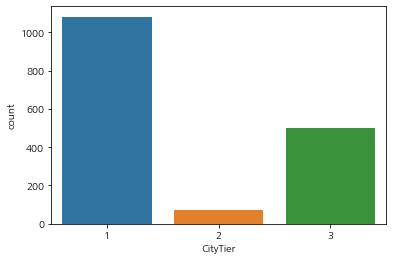

In [50]:
sns.countplot(data=df, x="CityTier");

### DurationOfPitch: 고객에게 제공하는 프레젠테이션 기간

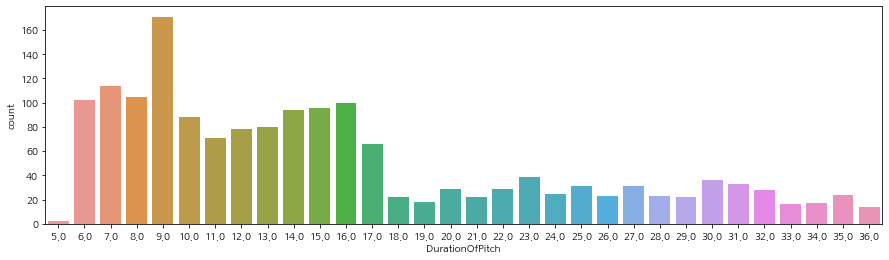

In [54]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="DurationOfPitch");

### Gender: 성별
`Fe Male`과 `Female`은 같은 것 아닌가..?

In [61]:
df["Gender"] = df["Gender"].str.replace("Fe Male", "Female")

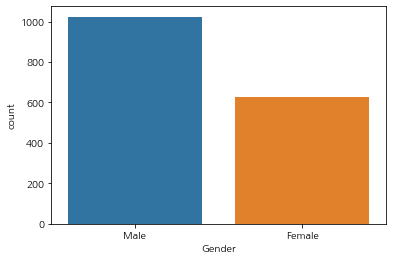

In [62]:
sns.countplot(data=df, x="Gender");

### NumberOfPersonVisiting: 고객과 함께 여행을 계획 중인 총 인원

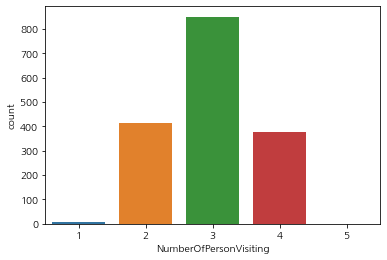

In [64]:
sns.countplot(data=df, x="NumberOfPersonVisiting");

### NumberOfFollowups: 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
정확히 의미하는게 뭔지 모르겠음

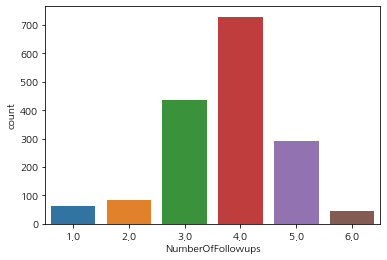

In [67]:
sns.countplot(data=df, x="NumberOfFollowups");

### ProductPitched: 영업 사원이 제시한 상품

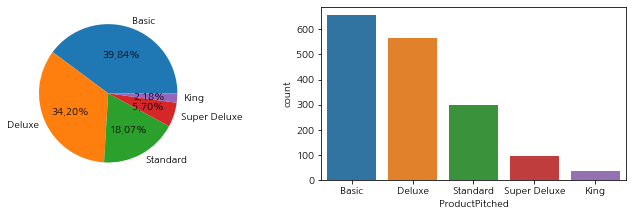

In [96]:
plt.figure(figsize=(12, 7), facecolor="white")
plt.subplot(221)
plt.pie(df["ProductPitched"].value_counts().values, labels=df["ProductPitched"].value_counts().index, autopct="%.2f%%")
plt.subplot(222)
sns.countplot(data=df, x="ProductPitched")
plt.show()

### PreferredPropertyStar: 선호 호텔 숙박업소 등급

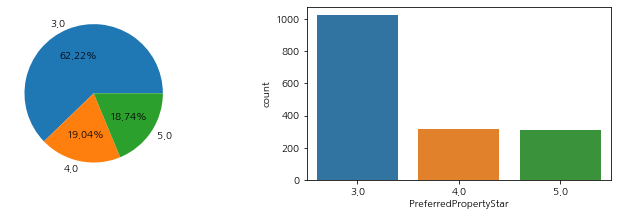

In [97]:
plt.figure(figsize=(12, 7), facecolor="white")
plt.subplot(221)
plt.pie(df["PreferredPropertyStar"].value_counts().values, labels=df["PreferredPropertyStar"].value_counts().index, autopct="%.2f%%")
plt.subplot(222)
sns.countplot(data=df, x="PreferredPropertyStar")
plt.show()

### MaritalStatus: 결혼여부

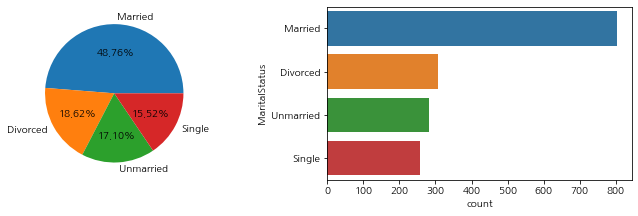

In [110]:
plt.figure(figsize=(12, 7))
plt.subplot(221)
plt.pie(df["MaritalStatus"].value_counts().values, labels=df["MaritalStatus"].value_counts().index, autopct="%.2f%%")
plt.subplot(222)
sns.countplot(data=df, y="MaritalStatus")
plt.show()

### NumberOfTrips: 평균 연간 여행 횟수

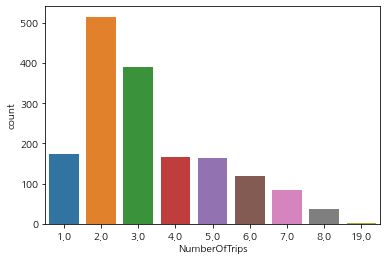

In [113]:
sns.countplot(data=df, x="NumberOfTrips");

### Passport: 여권 보유 여부 (0: 없음, 1: 있음)

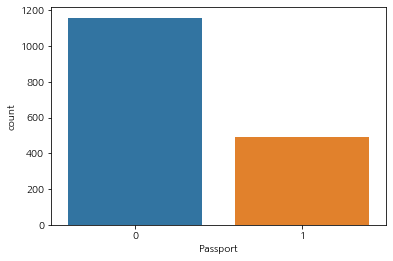

In [115]:
sns.countplot(data=df, x="Passport");

### PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도

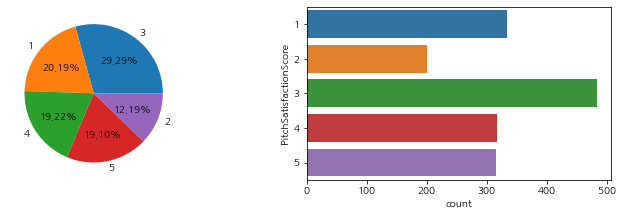

In [117]:
plt.figure(figsize=(12, 7))
plt.subplot(221)
plt.pie(df["PitchSatisfactionScore"].value_counts().values, labels=df["PitchSatisfactionScore"].value_counts().index, autopct="%.2f%%")
plt.subplot(222)
sns.countplot(data=df, y="PitchSatisfactionScore")
plt.show()

### OwnCar: 자동차 보유 여부 (0: 없음, 1: 있음)

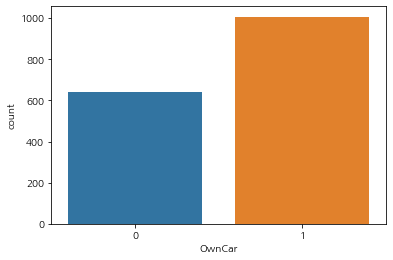

In [118]:
sns.countplot(data=df, x="OwnCar");

### NumberOfChildrenVisiting: 함께 여행을 계획 중인 5세 미만의 어린이 수

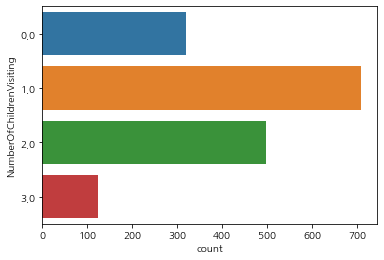

In [119]:
sns.countplot(data=df, y="NumberOfChildrenVisiting");

### Designation: (직업의) 직급

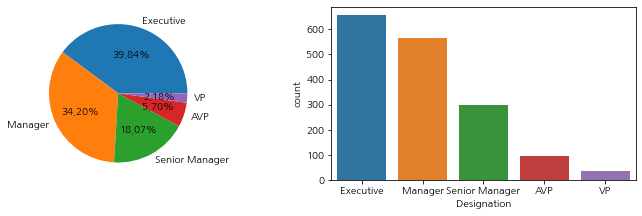

In [121]:
plt.figure(figsize=(12, 7))
plt.subplot(221)
plt.pie(df["Designation"].value_counts().values, labels=df["Designation"].value_counts().index, autopct="%.2f%%")
plt.subplot(222)
sns.countplot(data=df, x="Designation")
plt.show()

### MonthlyIncome: 월 급여

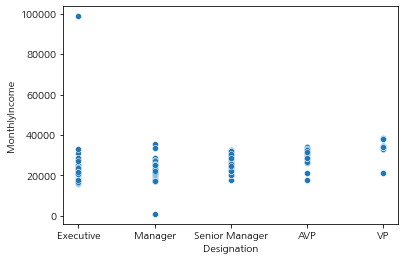

In [125]:
sns.scatterplot(data=df, x="Designation", y="MonthlyIncome");

### 상관 관계로 본 시각화

In [127]:
df.corr().style.background_gradient()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
Age,1.000000,0.033529,0.029778,-0.012849,-0.008390,-0.036489,0.159212,0.022971,0.021750,0.054116,0.008566,0.395895,-0.135492
CityTier,0.033529,1.000000,0.046901,0.013853,0.037725,-0.014760,-0.003453,0.011981,-0.021170,0.008209,0.034489,0.087267,0.092058
DurationOfPitch,0.029778,0.046901,1.000000,0.096068,0.041194,-0.004250,0.011804,0.032649,0.023472,-0.012067,0.049944,0.031217,0.085951
NumberOfPersonVisiting,-0.012849,0.013853,0.096068,1.000000,0.326640,0.042306,0.202954,0.027440,-0.013569,0.013995,0.596438,0.137496,-0.000034
NumberOfFollowups,-0.008390,0.037725,0.041194,0.326640,1.000000,-0.038893,0.127553,-0.000995,-0.003998,0.052751,0.288034,0.170894,0.111179
PreferredPropertyStar,-0.036489,-0.014760,-0.004250,0.042306,-0.038893,1.000000,0.022002,0.010202,-0.016387,0.021871,0.049459,-0.025088,0.122504
NumberOfTrips,0.159212,-0.003453,0.011804,0.202954,0.127553,0.022002,1.000000,0.009405,0.024463,0.002892,0.176531,0.116626,0.040269
Passport,0.022971,0.011981,0.032649,0.027440,-0.000995,0.010202,0.009405,1.000000,0.037928,-0.052333,0.022889,0.019683,0.323373
PitchSatisfactionScore,0.021750,-0.021170,0.023472,-0.013569,-0.003998,-0.016387,0.024463,0.037928,1.000000,0.088033,0.022475,-0.031487,0.064392
OwnCar,0.054116,0.008209,-0.012067,0.013995,0.052751,0.021871,0.002892,-0.052333,0.088033,1.000000,0.028383,0.113864,-0.037627
